**Open and clean the election and district data**

In [ ]:
#import dependancies
import pyreadr
import pandas as pd
import us
import numpy
import geopandas as gpd
import geojson
from pymongo import MongoClient
import pymongo
from pprint import pprint
import json
import csv
import numpy as np
import re
from bson.objectid import ObjectId
import matplotlib.pyplot as plt
pymongo.version

*clean the rfile with the election resulsts*

In [ ]:
#file to open
file = "./Data/presidential_county_election_1868_2020.Rdata"
#read rfile
r_data = pyreadr.read_r(file)
#read the file into dataframe
elecdf = pd.DataFrame(r_data['pres_elections_release'])
#get info of dataframe
elecdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113756 entries, 0 to 113755
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   election_year                          113756 non-null  float64
 1   fips                                   113706 non-null  object 
 2   county_name                            113756 non-null  object 
 3   state                                  113756 non-null  object 
 4   sfips                                  113756 non-null  object 
 5   office                                 113756 non-null  object 
 6   election_type                          113756 non-null  object 
 7   seat_status                            113756 non-null  object 
 8   democratic_raw_votes                   113668 non-null  float64
 9   dem_nominee                            113756 non-null  object 
 10  republican_raw_votes                   113668 non-null  

In [ ]:
#cut unneccesary columns
electrimdf = elecdf[['election_year','fips','county_name','state','democratic_raw_votes','dem_nominee','republican_raw_votes','rep_nominee','county_end_date']]
electrimdf

,election_year,fips,county_name,state,democratic_raw_votes,dem_nominee,republican_raw_votes,rep_nominee,county_end_date
0,1868.0,01001,AUTAUGA,AL,851.0,Horatio Seymour,1505.0,Ulysses S. Grant,None
1,1872.0,01001,AUTAUGA,AL,669.0,Horace Greeley,1593.0,Ulysses S. Grant,None
2,1876.0,01001,AUTAUGA,AL,804.0,Samuel J. Tilden,1576.0,Rutherford B. Hayes,None
3,1880.0,01001,AUTAUGA,AL,978.0,Winfield Scott Hancock,974.0,James A. Garfield,None
4,1884.0,01001,AUTAUGA,AL,911.0,Grover Cleveland,877.0,James G. Blaine,None
...,...,...,...,...,...,...,...,...,...
113751,1904.0,NaN,JAMES,TN,222.0,Alton B. Parker,533.0,Theodore Roosevelt,1919-12-11
113752,1908.0,NaN,MANCHESTER,VA,363.0,William Jennings Bryan,114.0,William Howard Taft,1910-05-15
113753,1908.0,NaN,JAMES,TN,217.0,William Jennings Bryan,608.0,William Howard Taft,1919-12-11
113754,1912.0,NaN,JAMES,TN,202.0,Woodrow Wilson,169.0,William Howard Taft,1919-12-11


In [ ]:
#change type of election year to number
electrimdf['election_year'] = electrimdf['election_year'].astype(int)
electrimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113756 entries, 0 to 113755
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   election_year         113756 non-null  int64  
 1   fips                  113706 non-null  object 
 2   county_name           113756 non-null  object 
 3   state                 113756 non-null  object 
 4   democratic_raw_votes  113668 non-null  float64
 5   dem_nominee           113756 non-null  object 
 6   republican_raw_votes  113668 non-null  float64
 7   rep_nominee           113756 non-null  object 
 8   county_end_date       336 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.8+ MB


/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1071/3610682371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrimdf['election_year'] = electrimdf['election_year'].astype(int)


In [ ]:
#fill NA and convert them to number
electrimdf['democratic_raw_votes'] = electrimdf['democratic_raw_votes'].fillna(0.0).astype(float)
electrimdf['republican_raw_votes'] = electrimdf['republican_raw_votes'].fillna(0.0).astype(float)
#change type of votes to an int
electrimdf['democratic_raw_votes'] = electrimdf['democratic_raw_votes'].astype(int)
electrimdf['republican_raw_votes'] = electrimdf['republican_raw_votes'].astype(int)
electrimdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113756 entries, 0 to 113755
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   election_year         113756 non-null  int64 
 1   fips                  113706 non-null  object
 2   county_name           113756 non-null  object
 3   state                 113756 non-null  object
 4   democratic_raw_votes  113756 non-null  int64 
 5   dem_nominee           113756 non-null  object
 6   republican_raw_votes  113756 non-null  int64 
 7   rep_nominee           113756 non-null  object
 8   county_end_date       336 non-null     object
dtypes: int64(3), object(6)
memory usage: 7.8+ MB


/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1071/2283963463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrimdf['democratic_raw_votes'] = electrimdf['democratic_raw_votes'].fillna(0.0).astype(float)
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_1071/2283963463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrimdf['republican_raw_votes'] = electrimdf['republican_raw_votes'].fillna(0.0).astype(float)
/var/folders/08/4n5vtwsd5jg4pw1917ng_prc0000gn/T/ipykernel_107

In [ ]:
#rename columns
electrimdf = electrimdf.rename(columns={'democratic_raw_votes':"dem_votes","republican_raw_votes":"rep_votes"})
electrimdf

,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee,county_end_date
0,1868,01001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant,None
1,1872,01001,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant,None
2,1876,01001,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes,None
3,1880,01001,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield,None
4,1884,01001,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine,None
...,...,...,...,...,...,...,...,...,...
113751,1904,NaN,JAMES,TN,222,Alton B. Parker,533,Theodore Roosevelt,1919-12-11
113752,1908,NaN,MANCHESTER,VA,363,William Jennings Bryan,114,William Howard Taft,1910-05-15
113753,1908,NaN,JAMES,TN,217,William Jennings Bryan,608,William Howard Taft,1919-12-11
113754,1912,NaN,JAMES,TN,202,Woodrow Wilson,169,William Howard Taft,1919-12-11


In [ ]:
#output the trimmed dataframe to a csv
electrimdf.to_csv("./Data/election_results.csv",header=True,index=False)

*open and clean the district county csv*

In [ ]:
#open the dataframe
countycondist = pd.read_csv("./Data/2016_2020_Counties_Districts.csv")
countycondist.head()

,Year,GEO ID,County,Congressional District,State,Total Population,18 Years and Over,"CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population"
0,2016,5101500US0637037,Los Angeles County (part),Congressional District 37 (115th Congress),California,722138,579089,455342
1,2016,5101500US0638037,Los Angeles County (part),Congressional District 38 (115th Congress),California,701394,536049,450500
2,2016,5101500US0638059,Orange County (part),Congressional District 38 (115th Congress),California,15834,12655,11127
3,2016,5101500US0639037,Los Angeles County (part),Congressional District 39 (115th Congress),California,198582,161004,134094
4,2016,5101500US0639059,Orange County (part),Congressional District 39 (115th Congress),California,446374,343472,288118


In [ ]:
#get info of the data frame
countycondist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7379 entries, 0 to 7378
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Year                                                              7379 non-null   int64 
 1   GEO ID                                                            7379 non-null   object
 2   County                                                            7379 non-null   object
 3   Congressional District                                            7379 non-null   object
 4   State                                                             7379 non-null   object
 5   Total Population                                                  7379 non-null   int64 
 6   18 Years and Over                                                 7379 non-null   int64 
 7   CITIZEN, VOTING AGE POPULATION - Citizen, 1

In [ ]:
#rename the columns
countycondist= countycondist.rename(columns={"Congressional District":"Congressional_District",
                                             "Total Population":"Total_Population",
                                             "18 years and over":"Age_18+",
                                             "CITIZEN, VOTING AGE POPULATION - Citizen, 18 and over population":"Voting_Age_Population"})
countycondist.head()

,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population
0,2016,5101500US0637037,Los Angeles County (part),Congressional District 37 (115th Congress),California,722138,579089,455342
1,2016,5101500US0638037,Los Angeles County (part),Congressional District 38 (115th Congress),California,701394,536049,450500
2,2016,5101500US0638059,Orange County (part),Congressional District 38 (115th Congress),California,15834,12655,11127
3,2016,5101500US0639037,Los Angeles County (part),Congressional District 39 (115th Congress),California,198582,161004,134094
4,2016,5101500US0639059,Orange County (part),Congressional District 39 (115th Congress),California,446374,343472,288118


In [ ]:
#create copy of data frame
countycondistcopy1 = countycondist
#drop places where there is no voting population
countycondistcopy1 = countycondistcopy1.drop(countycondistcopy1[countycondistcopy1['Voting_Age_Population'] == 0].index)
countycondistcopy1 = countycondistcopy1.reset_index()

In [ ]:
#check info of dataframe
countycondistcopy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   7360 non-null   int64 
 1   Year                    7360 non-null   int64 
 2   GEO ID                  7360 non-null   object
 3   County                  7360 non-null   object
 4   Congressional_District  7360 non-null   object
 5   State                   7360 non-null   object
 6   Total_Population        7360 non-null   int64 
 7   18 Years and Over       7360 non-null   int64 
 8   Voting_Age_Population   7360 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 517.6+ KB


In [ ]:
#clear (part) out of district names
countycondistcopy1["County"] = countycondistcopy1["County"].str.split(" \\(",expand=True)[0]
countycondistcopy1

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population
0,0,2016,5101500US0637037,Los Angeles County,Congressional District 37 (115th Congress),California,722138,579089,455342
1,1,2016,5101500US0638037,Los Angeles County,Congressional District 38 (115th Congress),California,701394,536049,450500
2,2,2016,5101500US0638059,Orange County,Congressional District 38 (115th Congress),California,15834,12655,11127
3,3,2016,5101500US0639037,Los Angeles County,Congressional District 39 (115th Congress),California,198582,161004,134094
4,4,2016,5101500US0639059,Orange County,Congressional District 39 (115th Congress),California,446374,343472,288118
...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,St. Charles Parish,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080
7356,7375,2020,5101600US2206091,St. Helena Parish,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667
7357,7376,2020,5101600US2206095,St. John the Baptist Parish,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814
7358,7377,2020,5101600US2206109,Terrebonne Parish,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235


In [ ]:
#remove county from county column
countycondistcopy1["County"] = countycondistcopy1["County"].str.split(" County",expand=True)[0]
countycondistcopy1

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population
0,0,2016,5101500US0637037,Los Angeles,Congressional District 37 (115th Congress),California,722138,579089,455342
1,1,2016,5101500US0638037,Los Angeles,Congressional District 38 (115th Congress),California,701394,536049,450500
2,2,2016,5101500US0638059,Orange,Congressional District 38 (115th Congress),California,15834,12655,11127
3,3,2016,5101500US0639037,Los Angeles,Congressional District 39 (115th Congress),California,198582,161004,134094
4,4,2016,5101500US0639059,Orange,Congressional District 39 (115th Congress),California,446374,343472,288118
...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,St. Charles Parish,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080
7356,7375,2020,5101600US2206091,St. Helena Parish,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667
7357,7376,2020,5101600US2206095,St. John the Baptist Parish,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814
7358,7377,2020,5101600US2206109,Terrebonne Parish,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235


In [ ]:
#Capitolize the county to merge correctly with other dataframe
countycondistcopy1["County"] = countycondistcopy1["County"].str.upper()
countycondistcopy1

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population
0,0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342
1,1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500
2,2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127
3,3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094
4,4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118
...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,ST. CHARLES PARISH,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080
7356,7375,2020,5101600US2206091,ST. HELENA PARISH,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667
7357,7376,2020,5101600US2206095,ST. JOHN THE BAPTIST PARISH,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814
7358,7377,2020,5101600US2206109,TERREBONNE PARISH,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235


In [ ]:
#remove PARISH from county names
countycondistcopy1["County"] = countycondistcopy1["County"].str.split(" PARISH",expand=True)[0]
countycondistcopy1

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population
0,0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342
1,1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500
2,2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127
3,3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094
4,4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118
...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,ST. CHARLES,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080
7356,7375,2020,5101600US2206091,ST. HELENA,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667
7357,7376,2020,5101600US2206095,ST. JOHN THE BAPTIST,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814
7358,7377,2020,5101600US2206109,TERREBONNE,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235


In [ ]:
#adding a column for the percentage of voting population of a county in a district
percentoftotal = []#holder for the percentages
#itterate throught the dataframe
for index, row in countycondistcopy1.iterrows():
    #get all counties with the same name, year, and state
    test = countycondistcopy1.loc[(countycondistcopy1['County']==row['County'])&(countycondistcopy1['Year']==row["Year"])&(countycondistcopy1['State']==row["State"])]
    #add together the voting age population
    testsum = test["Voting_Age_Population"].sum()
    #add the percentage of the total to the array
    percentoftotal.append(round(row["Voting_Age_Population"]/testsum,2))

print(percentoftotal)

[0.07, 0.07, 0.01, 0.02, 0.14, 0.04, 0.05, 0.3, 0.34, 0.07, 0.06, 0.25, 0.18, 0.04, 0.1, 0.26, 0.06, 0.18, 0.04, 0.2, 1.0, 0.14, 0.24, 0.24, 0.1, 1.0, 0.12, 0.73, 1.0, 1.0, 0.3, 1.0, 1.0, 0.14, 1.0, 0.53, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.02, 0.01, 1.0, 1.0, 0.27, 1.0, 1.0, 0.66, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.47, 1.0, 0.23, 0.89, 0.34, 0.76, 0.73, 1.0, 0.62, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.38, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.07, 1.0, 0.39, 1.0, 1.0, 0.63, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.16, 0.52, 0.37, 0.14, 0.12, 0.4, 0.17, 0.32, 0.12, 0.27, 0.33, 0.6, 0.11, 1.0, 1.0, 0.4, 1.0, 1.0, 0.48, 1.0, 0.36, 1.0, 0.23, 0.54, 0.61, 0.61, 0.52, 0.52, 1.0, 0.21, 1.0, 0.37, 0.08, 0.79, 0.63, 0.01, 0.71, 0.26, 0.26, 0.17, 0.59, 0.07, 0.38, 0.02, 0.04, 0.43, 0.09, 0.74, 0.14, 0.11, 0.06, 0.69, 0.01, 0.55, 0.43, 0

In [ ]:
#add new column to the dataframe
countycondistcopy1["Percent_in_District"] = percentoftotal
countycondistcopy1

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population,Percent_in_District
0,0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342,0.07
1,1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500,0.07
2,2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127,0.01
3,3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094,0.02
4,4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118,0.14
...,...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,ST. CHARLES,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080,0.36
7356,7375,2020,5101600US2206091,ST. HELENA,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667,0.72
7357,7376,2020,5101600US2206095,ST. JOHN THE BAPTIST,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814,0.31
7358,7377,2020,5101600US2206109,TERREBONNE,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235,0.40


*create a data frame with state name, state abbreviation, and state fips*

In [ ]:
#get abbreviation and state name in a dataframe
stateabrev = pd.DataFrame([us.states.mapping('abbr', 'name')])
#orient dataframe correctly
stateabrev = stateabrev.transpose()
stateabrev = stateabrev.reset_index()
#rename columns
stateabrev = stateabrev.rename(columns={"index":"Abbr",0:"State"})
#get abbreviation and state fips in a dataframe
fipsabbrev = pd.DataFrame([us.states.mapping('abbr', 'fips')])
#orient the dataframe
fipsabbrev = fipsabbrev.transpose()
fipsabbrev = fipsabbrev.reset_index()
#rename columns
fipsabbrev = fipsabbrev.rename(columns={"index":"Abbr",0:"state_fips"})
#merge dataframes together to get all 3 in one dataframe
fipsabbrevstate = pd.merge(fipsabbrev,stateabrev,on="Abbr")
#output the dataframe to a json
fipsabbrevstate.to_json("./Data/state_info.json",orient='records')


**merge dataframes together to get election results by district**

In [ ]:
#read in election results dataframe
electomerge = pd.read_csv("./Data/election_results.csv")
electomerge.head()

,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee,county_end_date
0,1868,1001.0,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant,NaN
1,1872,1001.0,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant,NaN
2,1876,1001.0,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes,NaN
3,1880,1001.0,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield,NaN
4,1884,1001.0,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine,NaN


In [ ]:
#merge districts and state to have state abbreviation and fips
countycondiststateab = pd.merge(countycondistcopy1,fipsabbrevstate,on="State")
#merge district information with election information
countydistwithelec = pd.merge(countycondiststateab,electomerge,how="left",left_on=["Year","County","Abbr"],right_on=["election_year","county_name","state"])
countydistwithelec

,index,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population,Percent_in_District,...,state_fips,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee,county_end_date
0,0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342,0.07,...,06,2016.0,6037.0,LOS ANGELES,CA,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,NaN
1,1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500,0.07,...,06,2016.0,6037.0,LOS ANGELES,CA,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,NaN
2,2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127,0.01,...,06,2016.0,6059.0,ORANGE,CA,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump,NaN
3,3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094,0.02,...,06,2016.0,6037.0,LOS ANGELES,CA,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,NaN
4,4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118,0.14,...,06,2016.0,6059.0,ORANGE,CA,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,7374,2020,5101600US2206089,ST. CHARLES,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080,0.36,...,22,2020.0,22089.0,ST. CHARLES,LA,9800.0,Joe Biden,18233.0,Donald Trump,NaN
7356,7375,2020,5101600US2206091,ST. HELENA,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667,0.72,...,22,2020.0,22091.0,ST. HELENA,LA,3346.0,Joe Biden,2714.0,Donald Trump,NaN
7357,7376,2020,5101600US2206095,ST. JOHN THE BAPTIST,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814,0.31,...,22,2020.0,22095.0,ST. JOHN THE BAPTIST,LA,13582.0,Joe Biden,7538.0,Donald Trump,NaN
7358,7377,2020,5101600US2206109,TERREBONNE,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235,0.40,...,22,2020.0,22109.0,TERREBONNE,LA,11198.0,Joe Biden,34339.0,Donald Trump,NaN


In [ ]:
#make copy of dataframe
countydistwitheleccopy = countydistwithelec
#drop unneccesary columns
countydistwitheleccopy = countydistwitheleccopy.drop(columns=["index","election_year","fips","county_name","state","county_end_date"])
countydistwitheleccopy

,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population,Percent_in_District,Abbr,state_fips,dem_votes,dem_nominee,rep_votes,rep_nominee
0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342,0.07,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump
1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500,0.07,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump
2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127,0.01,CA,06,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump
3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094,0.02,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump
4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118,0.14,CA,06,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,2020,5101600US2206089,ST. CHARLES,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080,0.36,LA,22,9800.0,Joe Biden,18233.0,Donald Trump
7356,2020,5101600US2206091,ST. HELENA,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667,0.72,LA,22,3346.0,Joe Biden,2714.0,Donald Trump
7357,2020,5101600US2206095,ST. JOHN THE BAPTIST,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814,0.31,LA,22,13582.0,Joe Biden,7538.0,Donald Trump
7358,2020,5101600US2206109,TERREBONNE,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235,0.40,LA,22,11198.0,Joe Biden,34339.0,Donald Trump


In [ ]:
#multiply the votes with the with the percent in district to get correct votes in each district
countydistwitheleccopy["County_dem_votes"] = numpy.floor(countydistwitheleccopy["Percent_in_District"]*countydistwitheleccopy["dem_votes"])
countydistwitheleccopy["County_rep_votes"] = numpy.floor(countydistwitheleccopy["Percent_in_District"]*countydistwitheleccopy["rep_votes"])
countydistwitheleccopy

,Year,GEO ID,County,Congressional_District,State,Total_Population,18 Years and Over,Voting_Age_Population,Percent_in_District,Abbr,state_fips,dem_votes,dem_nominee,rep_votes,rep_nominee,County_dem_votes,County_rep_votes
0,2016,5101500US0637037,LOS ANGELES,Congressional District 37 (115th Congress),California,722138,579089,455342,0.07,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,171313.0,53548.0
1,2016,5101500US0638037,LOS ANGELES,Congressional District 38 (115th Congress),California,701394,536049,450500,0.07,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,171313.0,53548.0
2,2016,5101500US0638059,ORANGE,Congressional District 38 (115th Congress),California,15834,12655,11127,0.01,CA,06,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump,6037.0,5027.0
3,2016,5101500US0639037,LOS ANGELES,Congressional District 39 (115th Congress),California,198582,161004,134094,0.02,CA,06,2447329.0,Hillary Rodham Clinton,764984.0,Donald Trump,48946.0,15299.0
4,2016,5101500US0639059,ORANGE,Congressional District 39 (115th Congress),California,446374,343472,288118,0.14,CA,06,603787.0,Hillary Rodham Clinton,502717.0,Donald Trump,84530.0,70380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,2020,5101600US2206089,ST. CHARLES,Congressional District 6 (116th Congress),Louisiana,18575,14423,14080,0.36,LA,22,9800.0,Joe Biden,18233.0,Donald Trump,3528.0,6563.0
7356,2020,5101600US2206091,ST. HELENA,Congressional District 6 (116th Congress),Louisiana,7481,5829,5667,0.72,LA,22,3346.0,Joe Biden,2714.0,Donald Trump,2409.0,1954.0
7357,2020,5101600US2206095,ST. JOHN THE BAPTIST,Congressional District 6 (116th Congress),Louisiana,13423,9978,9814,0.31,LA,22,13582.0,Joe Biden,7538.0,Donald Trump,4210.0,2336.0
7358,2020,5101600US2206109,TERREBONNE,Congressional District 6 (116th Congress),Louisiana,43402,33095,32235,0.40,LA,22,11198.0,Joe Biden,34339.0,Donald Trump,4479.0,13735.0


In [ ]:
#remove(###th congress from congressional ditrict)
countydistwitheleccopy["Congressional_District"] = countydistwitheleccopy["Congressional_District"].str.split(" \\(11",expand=True)[0]

*get district votes from county votes*

In [ ]:
#get the votes in each district
distrepvotes = [] #placeholder for district rep votes
distdemvotes = [] #placeholder for district dem votes
#itterate through dataframe
for index, row in countydistwitheleccopy.iterrows():
    #get same district information rows in dataframe
    samedist = countydistwitheleccopy.loc[(countydistwitheleccopy['Congressional_District']==row['Congressional_District'])&(countydistwitheleccopy['Year']==row["Year"])&(countydistwitheleccopy['State']==row["State"])]
    #sum up county votes into a district
    repsum = samedist["County_rep_votes"].sum()
    demsum = samedist["County_dem_votes"].sum()
    #add votes to array
    distrepvotes.append(repsum)
    distdemvotes.append(demsum)

print(distdemvotes)
print(distrepvotes)

[171313.0, 177350.0, 177350.0, 147094.0, 147094.0, 147094.0, 122366.0, 104399.0, 118319.0, 171313.0, 146839.0, 150946.0, 108681.0, 158271.0, 158271.0, 156984.0, 166526.0, 166526.0, 158696.0, 158696.0, 132845.0, 132845.0, 173733.0, 173733.0, 279832.0, 279832.0, 279832.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 255275.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150999.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 150111.0, 123405.0, 123405.0, 123405.0, 123405.0, 123405.0, 187848.0, 187848.0, 187848.0, 190750.0, 190750.0, 210286.0,

In [ ]:
#make copy of dataframe
elecbydist1 = countydistwitheleccopy
#add district votes to dataframe
elecbydist1["District_dem_votes"] = distdemvotes
elecbydist1["District_rep_votes"] = distrepvotes
#remove county information from dataframe
elecbydist2 = elecbydist1[["Year","State","state_fips","Congressional_District","District_dem_votes","District_rep_votes"]]
#since each county had the same sum of district votes dropping duplicates to get information about just districts
elecbydist2 = elecbydist2.drop_duplicates()
elecbydist2 = elecbydist2.reset_index(drop=True)
#sort the dataframe
elecbydist2 = elecbydist2.sort_values(["Year","State","Congressional_District"],ascending=[True,True,True])
elecbydist2

,Year,State,state_fips,Congressional_District,District_dem_votes,District_rep_votes
166,2016,Alabama,01,Congressional District 1,103967.0,192270.0
167,2016,Alabama,01,Congressional District 2,98925.0,183652.0
168,2016,Alabama,01,Congressional District 3,95117.0,183965.0
169,2016,Alabama,01,Congressional District 4,53969.0,225667.0
170,2016,Alabama,01,Congressional District 5,97169.0,200644.0
...,...,...,...,...,...,...
778,2020,Wisconsin,55,Congressional District 5,191202.0,252066.0
779,2020,Wisconsin,55,Congressional District 6,169030.0,236272.0
780,2020,Wisconsin,55,Congressional District 7,166323.0,246560.0
781,2020,Wisconsin,55,Congressional District 8,174616.0,239369.0


*get state votes from district votes*

In [ ]:
#make copy of data frame
elecbydist2copy = elecbydist2
staterepvotes = [] #state rep votes place holder
statedemvotes = [] #state dem votes place holder
#itterate through dataframe
for index, row in elecbydist2copy.iterrows():
        #get all districts in a state
        samestate = elecbydist2copy.loc[(elecbydist2copy['State']==row['State'])&(elecbydist2copy['Year']==row["Year"])]
        #sum the votes for states
        repsum = samestate["District_rep_votes"].sum()
        demsum = samestate["District_dem_votes"].sum()
        #add votes to array
        staterepvotes.append(repsum)
        statedemvotes.append(demsum)
#add the state votes to dataframe
elecbydist2copy["State_dem_votes"] = statedemvotes
elecbydist2copy["State_rep_votes"] = staterepvotes
#drop district information
elecbydist2copy =elecbydist2copy.drop(columns=["Congressional_District","District_rep_votes","District_dem_votes"])
#since each district has the state total dropping extra rows to have just states
elecbydist2copy =elecbydist2copy.drop_duplicates()
#save dataframes
elecbydist2copy.to_csv("./Data/election_results_by_state.csv",header=True,index=False)
elecbydist2copy.to_json("./Data/election_results_by_state.json",orient='records')



In [ ]:
#save the district dataframe
elecbydist2.to_csv("./Data/election_results_by_district.csv",header=True,index=False)
elecbydist2.to_json("./Data/election_results_by_district.json",orient="records")

**Convert .shp files to geojsons**

In [ ]:
#import dependencies
import geopandas as gpd

In [ ]:
#create variables for shp files
file2012 = "./Data/ConDistricts/CongressionalDistricts2012/tl_2012_us_cd112.shp"
file2016 = "./Data/ConDistricts/CongressionalDistricts2016/tl_2016_us_cd115.shp"
file2020 = "./Data/ConDistricts/CongressionalDistricts2020/tl_2020_us_cd116.shp"
#open the shp files
shp_file12 = gpd.read_file(file2012)
shp_file16 = gpd.read_file(file2016)
shp_file20 = gpd.read_file(file2020)
#change the shps to geojsons
shp_file12.to_file('./Data/Geojson/ConDistricts2012.geojson', driver='GeoJSON')
shp_file16.to_file('./Data/Geojson/ConDistricts2016.geojson', driver='GeoJSON')
shp_file20.to_file('./Data/Geojson/ConDistricts2020.geojson', driver='GeoJSON')


**Add information we care about to the geo json**

In [ ]:
#import dependancies
import pandas as pd
import geojson

In [ ]:
#set years that we have data for
years = [2016,2020]
#loop through the years
for year in years:
    #open the geojson
    geofile = f"./Data/Geojson/ConDistricts{year}.geojson"
    #make sure file is closed at end to save memory
    with open(geofile,'r') as f:
        #load geojson
        geodata = geojson.load(f)
        #open state and district data
        elecbydist = pd.read_csv("./Data/election_results_by_district.csv")
        elecbystate = pd.read_csv("./Data/election_results_by_state.csv")
        #loop through features of geojson to make changes
        for feat in geodata['features']:
            proptoadd = {}#place holder for dictionaries to add to the feature
            #get information from district to add to geojson
            samedist = elecbydist.loc[(elecbydist["Year"] == year)&(elecbydist["state_fips"]==int(feat.properties['STATEFP']))&(elecbydist["Congressional_District"]==feat.properties['NAMELSAD'])]
            #account for misssing data
            if samedist.empty:
                proptoadd["WINNER"] = "Unknown"
                proptoadd["DEMVOTES"] = 0
                proptoadd["REPVOTES"] = 0
            else:
                #check winner of election
                if (samedist["District_dem_votes"].item() > samedist["District_rep_votes"].item()):
                    #add democrat winner information
                    proptoadd["WINNER"] = "Democrat"
                    proptoadd["DEMVOTES"] = samedist["District_dem_votes"].item()
                    proptoadd["REPVOTES"] = samedist["District_rep_votes"].item()
                else:
                    # add republican winner information
                    proptoadd["WINNER"] = "Republican"
                    proptoadd["DEMVOTES"] = samedist["District_dem_votes"].item()
                    proptoadd["REPVOTES"] = samedist["District_rep_votes"].item()
            #Edit geojson with state election information
            samestate = elecbystate.loc[(elecbystate["Year"] == year)&(elecbystate["state_fips"]==int(feat.properties['STATEFP']))]
            #account for missing data
            if samestate.empty:
                proptoadd["STATENAME"] = "N/A"
                proptoadd["STATEWINNER"] = "Unknown"
                proptoadd["STATEDEMVOTES"] = 0
                proptoadd["STATEREPVOTES"] = 0
            else:
                if (samestate["State_dem_votes"].item() > samestate["State_rep_votes"].item()):
                    #add infor for democrat winner
                    proptoadd["STATENAME"] = samestate["State"].item()
                    proptoadd["STATEWINNER"] = "Democrat"
                    proptoadd["STATEDEMVOTES"] = samestate["State_dem_votes"].item()
                    proptoadd["STATEREPVOTES"] = samestate["State_rep_votes"].item()
                else:
                    #add info for republican winner
                    proptoadd["STATENAME"] = samestate["State"].item()
                    proptoadd["STATEWINNER"] = "Republican"
                    proptoadd["STATEDEMVOTES"] = samestate["State_dem_votes"].item()
                    proptoadd["STATEREPVOTES"] = samestate["State_rep_votes"].item()          
            #add information to geojson
            feat.properties.update(proptoadd)
        #open geojson for writing
        with open(f"./Data/Geojson/RevConDistricts{year}.geojson",'w') as out:
            #write the data
            geojson.dump(geodata,out)
        

### WORKBOOK I SUMMARY<br>Objectives: 
1. Transform the historic election csv data into a basic, 'shallow' json file for loading into a mongo database. This is the structure of theshallow Json file.
![Layered  JSON Structure for "Shallow" Historic Elelction Data](images/shallowJson.png)<br>
The 'shallow' json corresponds to this datframe:<br>
![Dataframe corresponding to "Shallow" Json](images/dataframe.png)<br>
2. Recast the historic election csv data into a more granualar json file for loading into mongodb database. The restructured json file is orgainzed into thirty-none dictionaries, each corresponding to one election. Each election-dictionary has three levels, national, state and county.<br>
![Layered  JSON Structure for "Deep" Historic Elelction Data](images/mongoDBLayers.png)<br>
3. Write the json files to disk for subsequent uplaod to mongodb

#### FUNCTIONS

In [ ]:
def default(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.integer):
        return int(obj)
    else:
        return super().default(obj)

### Convert csv to shallow Json File

#### -read csv file into dataframe, convert NaN to zeros, convet fips float to int

In [ ]:
historicElection_df = pd.read_csv('Data/election_results.csv')
historicElection_df.drop('county_end_date', axis=1, inplace=True)
historicElection_df['fips'] = historicElection_df['fips'].fillna(0)
historicElection_df['fips'] = historicElection_df['fips'].astype(int)
historicElection_df.head()

,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee
0,1868,1001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant
1,1872,1001,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant
2,1876,1001,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes
3,1880,1001,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield
4,1884,1001,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine


#### - convert to dict

In [ ]:
electionDict = historicElection_df.to_dict('records')
electionDict[5]

{'election_year': 1888,
 'fips': 1001,
 'county_name': 'AUTAUGA',
 'state': 'AL',
 'dem_votes': 893,
 'dem_nominee': 'Grover Cleveland',
 'rep_votes': 519,
 'rep_nominee': 'Benjamin Harrison'}

#### -write jsonified file

In [ ]:
#elections_json_object_1 = json.dumps(electionDict, default=default, indent = 4)
elections_json_object_1 = json.dumps(electionDict, indent = 4)

In [ ]:
with open("Data/historic_election_mongo.json", "w") as outfile: 
    outfile.write(elections_json_object_1)

#### - check read json file back into df and compare original with recreated df (checked: OK)

In [ ]:
hist_elec_from_Json_df = pd.read_json('Data/historic_election_mongo.json', orient='records')
hist_elec_from_Json_df.head()

,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee
0,1868,1001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant
1,1872,1001,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant
2,1876,1001,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes
3,1880,1001,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield
4,1884,1001,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine


In [ ]:
hist_elec_from_Json_df.dtypes

election_year     int64
fips              int64
county_name      object
state            object
dem_votes         int64
dem_nominee      object
rep_votes         int64
rep_nominee      object
dtype: object

In [ ]:
#hist_elec_from_Json_df_list = list(hist_elec_from_Json_df)
#print(type(hist_elec_from_Json_df_list))

<class 'list'>


### Make restructered 'deep' json file for granular mongodb <br>
1. construct sub-dataframes by election year
2. calculate national total stats
3. work down through states and counties using nested loop

In [ ]:
election_year_list = hist_elec_from_Json_df['election_year'].unique()
print(year_list)

[1868 1872 1876 1880 1884 1888 1892 1896 1900 1904 1908 1912 1916 1920
 1924 1928 1932 1936 1940 1944 1948 1952 1956 1960 1964 1968 1972 1976
 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020]


In [ ]:
election_df_list = []
for year in year_list:
    one_election_df = hist_elec_from_Json_df.loc[hist_elec_from_Json_df['election_year'] == year]
    election_df_list.append(one_election_df)
on_df = election_df_list[0]
on_df.head()


,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee
0,1868,1001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant
39,1868,1003,BALDWIN,AL,673,Horatio Seymour,558,Ulysses S. Grant
78,1868,1005,BARBOUR,AL,2210,Horatio Seymour,3168,Ulysses S. Grant
117,1868,1007,BIBB,AL,744,Horatio Seymour,492,Ulysses S. Grant
156,1868,1009,BLOUNT,AL,461,Horatio Seymour,275,Ulysses S. Grant


In [ ]:
elections={} # will hold individual election dictionaries
for single_election_df in election_df_list:
    tmp_election_dict = {}
    state_name=''
    county_name=''
    election_year=''
    #vote_summary_df = getTotalNationalVote(single_election_df)
    nationalVoteTotalDem = single_election_df['dem_votes'].sum()
    nationalVoteTotalRep = single_election_df['rep_votes'].sum()
    
    election_year                                 = int((single_election_df['election_year'].unique())[0])
    tmp_election_dict['election_year']            = election_year

    dem_candidate                                 = str(single_election_df['dem_nominee'].unique()[0]) #getDemCandidate(single_election_df)[0])
    print(f"type: {type(dem_candidate)}")
    tmp_election_dict['dem_candidate']            = str(dem_candidate)
    
    rep_candidate                                 = str(single_election_df['rep_nominee'].unique()[0]) #getRepCandidate(single_election_df)
    tmp_election_dict['rep_candidate']            = str(rep_candidate)
    
    if (nationalVoteTotalDem > nationalVoteTotalRep):
        winning_party = 'democrat'
        winning_candidate = dem_candidate 
    else:
        winning_party = 'republican'
        winning_candidate = rep_candidate
        
    tmp_election_dict['winning_party']            = winning_party
    tmp_election_dict['winning_candidate']        = winning_candidate
    
    tmp_election_dict['total_national_dem_votes'] = nationalVoteTotalDem
    
    tmp_election_dict['total_national_rep_votes'] = nationalVoteTotalRep
    
    list_of_states = single_election_df['state'].unique().tolist()

    tmp_election_dict['states'] = {}
    for state in list_of_states:
        tmp_state_dict = {}           
        this_state_df = single_election_df[single_election_df['state'] == state]
        tmp_state_dict['state_name']     = this_state_df['state']
        state_dem_vote                   = this_state_df['dem_votes'].sum()
        state_rep_vote                   = this_state_df['rep_votes'].sum()
        tmp_state_dict['state_name']     = state
        tmp_state_dict['state_dem_vote'] = state_dem_vote
        tmp_state_dict['state_rep_vote'] = state_rep_vote
        
        if (state_rep_vote > state_dem_vote):
            tmp_state_dict['state_winning_party']     = 'republican'
            tmp_state_dict['state_winning_candidate'] = rep_candidate
        else:
            tmp_state_dict['state_winning_party']     = 'democrat'
            tmp_state_dict['state_winning_candidate'] = dem_candidate

        tmp_election_dict['states'][state] = tmp_state_dict
    
        # get list of counties for current state
        list_of_counties = this_state_df['county_name'].unique().tolist()
        tmp_state_dict['counties']={}
        for county in list_of_counties:
            tmp_county_dict = {}

            tmp_county_dict['county_name']     = county
            this_fips                          = this_state_df.loc[this_state_df['county_name'] == county, 'fips']
            fips                               = this_fips.iloc[0]
            tmp_county_dict['fips'] = fips
            
            this_county_dem_vote               = this_state_df.loc[this_state_df['county_name'] == county, 'dem_votes']
            county_dem_vote                    = this_county_dem_vote.iloc[0]           
            tmp_county_dict['county_dem_vote'] = county_dem_vote
           
            this_county_rep_vote               = this_state_df.loc[this_state_df['county_name'] == county, 'rep_votes']
            county_rep_vote                    = this_county_rep_vote.iloc[0]
            tmp_county_dict['county_rep_vote'] = county_rep_vote
       
            if (county_rep_vote > county_dem_vote):
                tmp_county_dict['county_winning_party']     = 'republican'
                tmp_county_dict['county_winning_candidate'] = rep_candidate
            else:
                tmp_county_dict['state_winning_party']     = 'democrat'
                tmp_county_dict['state_winning_candidate'] = dem_candidate
                
            tmp_state_dict['counties'][county]= tmp_county_dict

        tmp_election_dict['states'][state] = tmp_state_dict

    elections[election_year] = tmp_election_dict


elections_json_object = json.dumps(elections,default=default, indent = 4) # defaault = default
#print(elections_json_object)
with open("Data/historic_election_deep_mongo.json", "w") as outfile: 
    outfile.write(elections_json_object)

type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>
type: <class 'str'>


### WORKBOOK II SUMMARY<br>Objectives: 
1. Recast the historic election csv data into a more granualar mongodb database. The data is contained ina single COLLECTION ('deepElectionResults') with three levels, national, state and county, organized into a set of thirty-nine election years.<br>
![Structure of deep historic election results DB](images/MongoDeepDBStructure.png)
2. Create and test a set of utility functions to easily extract various data sets from the database. These are listed in the next section.
3. Prototype a dynamic plot to analyze state versus nationation voting trends. Exactly analogous methods can be deployed for county versus national and county versus state trends. This figure illustrates the selection and display of republican and democrat proportional vote the state of Illinois versus the national proportional vote. For example, the graph shows that in the 1920 and 1924 elections, the proportional divison of votes by party was more extreme in Illinois than for the nation as a whole. <br>
![Illustration of Dynamic Plotley Graph](images/proposedPercentVoteFigure.png)

### FUNCTIONS

#### List of Utility Functions
1. checkValidStateAndCountyNameForOneElection(electionDict, state, county, states_list)
2. getAllElectionYearsList(collection)
3. getAllElectionYearsAsStingsList(collection)
4. getAll_IdObjectsList(collection)
5. getAllStatesList(this_election)
6. getCountyListForAStateForOneElection(electionDict, state)
7. getDemVotesByStateForOneElection(electionDic
8. getElectionYearToIdDict(collection)
9. getNationalDemCandidate(electionDict)
10. getNationalDemVote(electionDict)
11. getNationalPercentVoteByYearByParty(collection)
12. getNationalRepCandidate(electionDict)
13. getNationalRepVote(electionDict)
14. getOneCountyDemVote(electionDict, state, county, states_list)
15. getOneCountyRepVote(electionDict, state, county, states_list)
16. getOneStateDemVote(electionDict, state)
17. getOneStateRepVote(electionDict, state)
18. getProportionalNationalVoteByPartyForOneElection
19. getProportionalStateVoteByPartyForOneElection(electionDict)
20. getRepVotesByStateForOneElection(electionDict)
21. getStatePercentVoteByYearByParty(collection, state)
22. getTotalNumberOfDocuments(data)
23. plotProportionalVoteByPartyForOneState(electionDict, state)

#### FUNCTION: checkValidStateAndCountyNameForOneElection(electionDict, state, county)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [ ]:
def checkValidStateAndCountyNameForOneElection(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    # check if valid state
    if state not in all_states_list_this_election:
        return 'check state name'
    else:
        county_list = list(election_2020['states'][state]['counties'].keys())
        if county in county_list:
            resultString = county + ' is valid'
            return resultString
        else:
            resultString = county + ' is not valid. All Caps? eg: "COOK"'
            return resultString

#### FUNCTION: getAllElectionYearsList(collection)<br>PARAMETER: collection<br>RETURNS: a list of integers

In [ ]:
def getAllElectionYearsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    all_election_years_list = []
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']
        all_election_years_list.append(this_year)

    unique_years=[]
    for yr in all_years:
        if yr not in unique_years:
            unique_years.append(yr)
    
    return unique_years

#### FUNCTION: getAllElectionYearsAsStringsList(collection)<br>PARAMETER: collection<br>RETURNS: a list of strings

In [ ]:
def getAllElectionYearsAsStringsList(collection):
    all_election_years_list = getAllElectionYearsList(collection)
    all_election_years_as_strings_list = [str(year) for year in all_election_years_list]
    return all_election_years_as_strings_list

#### FUNCTION: getAll_IdObjectsList(collection)<br>PARAMETER: a collection<br>RETURNS: a list

In [ ]:
def getAll_IdObjectsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    ObjectId_list=[]
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        ObjectId_list.append(object_id)
        
    return ObjectId_list

#### FUNCTION: getAllStatesList(this_election)<br>PARAMETER: an election dictionary<br>RETURNS: a list

In [ ]:
def getAllStatesList(this_election):
    all_state_dict = this_election['states']
    states_list = list(all_state_dict.keys())
    return states_list

#### FUNCTION: getCountyListForAStateForOneElection(electionDict, state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a list

In [ ]:
def getCountyListForAStateForOneElection(electionDict, state):
    county_list = list(electionDict['states'][state]['counties'].keys())
    return county_list

#### FUNCTION: getDemVotesByStateForOneElection(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an interger

In [ ]:
def getDemVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    dem_vote_by_state = {}
    for state in all_states_list_this_election:
        dem_vote = electionDict['states'][state]['state_dem_vote']
        dem_vote_by_state[state] = dem_vote
        
    return dem_vote_by_state

#### FUNCTION: getElectionYearToIdDict(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [ ]:
def getElectionYearToIdDict(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    electionToIdDict={}
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']  
        electionToIdDict[this_year] = objIDstring
        
    return electionToIdDict

#### FUNCTION: getNationalDemCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [ ]:
def getNationalDemCandidate(electionDict):
    national_rep_candidate = electionDict['total_national_rep_votes'] 
    return national_rep_candidate

#### FUNCTION: getNationalDemVote(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an integer

In [ ]:
def getNationalDemVote(electionDict):
    nationalDemVote = electionDict['total_national_dem_votes']  
    return nationalDemVote

#### FUNCTION: getNationalPercentVoteByYearByParty(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [ ]:
def getNationalPercentVoteByYearByParty(collection):

    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(collection)
    
    nationalVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalNationalVoteByPartyForOneElection(this_election)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        nationalVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
        
    return nationalVotePercentByYearByParty

#### FUNCTION: getNationalRepCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [ ]:
def getNationalRepCandidate(electionDict):
    national_dem_candidate = electionDict['total_national_dem_votes'] 
    return national_dem_candidate

#### FUNCTION: getNationalRepCandidate(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: a string

In [ ]:
def getNationalRepVote(electionDict):
    nationalRepVote = electionDict['total_national_rep_votes']  
    return nationalRepVote

#### FUNCTION: getOneCountyDemVote(electionDict, state, county)<br>PARAMETER: an election dictionary, a state, a county<br>RETURNS: an integer

In [ ]:
def getOneCountyDemVote(electionDict, state, county):

    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyDemVote = electionDict['states'][state]['counties'][county]['county_dem_vote']
        return countyDemVote
    else:
        return 'check state name'

#### FUNCTION: getOneCountyRepVote(electionDict, state, county)<br>PARAMETER: an election dictionary, a state, a county<br>RETURNS: an integer

In [ ]:
def getOneCountyRepVote(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyRepVote = electionDict['states'][state]['counties'][county]['county_rep_vote']  
        return countyRepVote
    else:
        return 'check state name'

#### FUNCTION: getOneStateDemVote(electionDict, state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: an integer

In [ ]:
def getOneStateDemVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateDemVote = electionDict['states'][state]['state_dem_vote']  
        return stateDemVote
    else:
        return 'check state name'

#### FUNCTION: getOneStateRepVote(electionDict, a state)<br>PARAMETER: an election dictionary, a state<br>RETURNS: an integer

In [ ]:
def getOneStateRepVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateRepVote = electionDict['states'][state]['state_rep_vote']  
        return stateRepVote
    else:
        return 'check state name'

#### FUNCTION: getProportionalNationalVoteByPartyForOneElection(electionDict)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a dictionary

In [ ]:
def getProportionalNationalVoteByPartyForOneElection(electionDict):
    
    nationalRepVote = getNationalRepVote(electionDict)
    nationalDemVote = getNationalDemVote(electionDict)

    proportionRep = round( nationalRepVote / (nationalDemVote + nationalRepVote), 2)
    proportionDem = round( nationalDemVote / (nationalDemVote + nationalRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote

#### FUNCTION: getProportionalStateVoteByPartyForOneElection(electionDict)<br>PARAMETER: an election dictionary, a state<br>RETURNS: a dictionary

In [ ]:
def getProportionalStateVoteByPartyForOneElection(electionDict, state):
    
    stateRepVote = getOneStateRepVote(electionDict, state)
    stateDemVote = getOneStateDemVote(electionDict, state)

    proportionRep = round( stateRepVote / (stateDemVote + stateRepVote), 2)
    proportionDem = round( stateDemVote / (stateDemVote + stateRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote

#### FUNCTION: getRepVotesByStateForOneElection(electionDict)<br>PARAMETER: an election dictionary<br>RETURNS: an interger

In [ ]:
def getRepVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    rep_vote_by_state = {}
    for state in all_states_list_this_election:
        rep_vote = electionDict['states'][state]['state_rep_vote']
        rep_vote_by_state[state] = rep_vote
        
    return rep_vote_by_state

#### FUNCTION: getStatePercentVoteByYearByParty(collection)<br>PARAMETER: a collection<br>RETURNS: a dictionary

In [ ]:
def getStatePercentVoteByYearByParty(collection, state):
    
    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(deepElectionResults)
    
    stateVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalStateVoteByPartyForOneElection(this_election, state)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        stateVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
    
    return stateVotePercentByYearByParty

#### FUNCTION: getTotalNumberOfDocuments(data)<br>PARAMETER: a mongo db object<br>RETURNS: an integer

In [ ]:
def getTotalNumberOfDocuments(data):
    count = 0
    for key, value in data.items():
        if isinstance(value, dict):
            count += getTotalNumberOfDocuments(value)
        else:
            count += 1
    return count

#### FUNCTION: plotProportionalVoteByPartyForOneState(electionDict, state)<br>PARAMETERS: an election dictionary, a state<br>RETURNS: code for a plot

In [ ]:
def plotProportionalVoteByPartyForOneState(collection, electionDict, state):

    #election_years = [1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948,1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
    #election_year_strings = ['1868', '1872', '1876', '1880', '1884', '1888', '1892', '1896', '1900', '1904', '1908', '1912', '1916', '1920', '1924', '1928', '1932', '1936', '1940', '1944', '1948','1952', '1956', '1960', '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']
    election_years=[]
    election_year_strings =[]
    election_years        = getAllElectionYearsList(collection)
    election_year_strings = getAllElectionYearsAsStringsList(collection)

    nationalVotePercentByYearByParty = getNationalPercentVoteByYearByParty(collection)
    #years_list = nationalVotePercentByYearByParty.keys()
    national_rep_percent_list=[]
    national_dem_percent_list=[]
    for year in election_year_strings:
        national_rep_percent_list.append(nationalVotePercentByYearByParty[year]['rep_percent'])
        national_dem_percent_list.append(nationalVotePercentByYearByParty[year]['dem_percent'])

    stateVotePercentByYearByParty = getStatePercentVoteByYearByParty(collection, state)
    #years_list = stateVotePercentByYearByParty.keys()
    state_rep_percent_list=[]
    state_dem_percent_list=[]
    for year in election_year_strings:
        state_rep_percent_list.append(stateVotePercentByYearByParty[year]['rep_percent'])
        state_dem_percent_list.append(stateVotePercentByYearByParty[year]['dem_percent'])
    
    x = election_years
    y_1 = state_rep_percent_list
    y_2 = state_dem_percent_list
    y_3 = national_rep_percent_list
    y_4 = national_dem_percent_list

    this_state = state
    plt.axhline(y = 0.5, color = 'grey', linestyle = '-', linewidth=0.5  )
    label_1 = 'republican-state: '+ state
    label_2 = 'democrat-state: '+ state
    plt.plot(x, y_1, label = label_1, linewidth= 1.0)
    plt.plot(x, y_2, label = label_2 ,linewidth= 1.0 )
    plt.plot(x, y_3, label = 'republican-national', linestyle = 'dashed', linewidth= 1.0)
    plt.plot(x, y_4, label = 'democrat-national',linestyle = 'dashed', linewidth= 1.0 )
    titleString = 'Percent Democrat and Republican Vote, National and '+ this_state

    plt.xticks(election_years, election_year_strings, fontsize=6, rotation = 50)
    plt.xlabel('election years')
    plt.ylabel('percent of total vote')
    plt.title(titleString)
    plt.legend()

    return plt

### Set up database

#### Bind 'mongo' variable to MongoClient
#### Note: move to same directory as input json file

In [ ]:
mongo = pymongo.MongoClient()

#### Create a Database and Bind it to the 'db' variable

In [ ]:
db = mongo['deepHistoricElectionResultstDB']

#### Create a Collection and Bind It To 'electionResults' variable

In [ ]:
deepElectionResults = db['deepElectionResults']
print(db.list_collection_names)

<bound method Database.list_collection_names of Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'deepHistoricElectionResultstDB')>


#### Read JSON File

In [ ]:
with open('Data/historic_election_deep_mongo.json', 'r') as f:
    data = json.load(f)

#### -calculate number of documents in db with function,<br>
getTotalNumberOfDocuments(data)
```def getTotalNumberOfDocuments(data):
    count = 0
    for key, value in data.items():
        if isinstance(value, dict):
            count += getTotalNumberOfDocuments(value)
        else:
            count += 1
    return count```

In [ ]:
print(type(data))
print(f"number of election dictionaries: {len(data)}")

number_of_documents = getTotalNumberOfDocuments(data)
print(f"total documents:  {number_of_documents}")

<class 'dict'>
number of election dictionaries: 39
total documents:  691908


#### - Inset Data Into Database with loop and 'insert_one()'
#### Note: db.deepElectionResults.insert_many([data]) failed due to <i>size limitation</i>
db.deepElectionResults.insert_many([data]) OperationFailure: BSONObj size: 20002780 (0x13137DC) is invalid. Size must be between 0 and 16793600(16MB) First element: _id: ObjectId('677af7823491609fbd8f2fc5'), full error: {'ok': 0.0, 'errmsg': "BSONObj size: 20002780 (0x13137DC) is invalid. Size must be between 0 and 16793600(16MB) First element: _id: ObjectId('677af7823491609fbd8f2fc5')", 'code': 10334, 'codeName': 'BSONObjectTooLarge'}

In [ ]:
#used loop with indsert_one() ot instantiate DB
for date in data:
    thisDict = data[date]
    print(type(thisDict))
    db.deepElectionResults.insert_one(thisDict)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


#### Confirm DB is as expected

In [ ]:
print(db.list_collection_names())

['deepElectionResults']


In [ ]:
#should have 39 (1 per electioj 1868 - 2020)
query = {}
documentCount = deepElectionResults.count_documents(query)
print(f"Document count: {documentCount}")

Document count: 117


#### - get and test getElectionYearTo_IdDict (check: OK)
```python
def getElectionYearToIdDict(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    electionToIdDict={}
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        this_year = deepElectionResults.find_one({"_id": object_id})['election_year']  
        electionToIdDict[this_year] = objIDstring
        
    return electionToIdDict```

In [ ]:
electionYearTo_IdDict = getElectionYearToIdDict(deepElectionResults)
inputYear = 2020
thisId = electionYearTo_IdDict[inputYear]
print(f"ObjectId string: {thisId}")

ObjectId string: 677ef59c19518aea4e756f85


#### - TEST: get one election (2020), extract year from document, compare (check: OK)

In [ ]:
object_id_string = electionYearTo_IdDict[2020]
object_id = ObjectId(object_id_string)
election_2020 = deepElectionResults.find_one({"_id": object_id})
retrieved_election_year = election_2020['election_year']
print(f"input year: {inputYear}, year retrieved from DB: {retrieved_election_year}")

input year: 2020, year retrieved from DB: 2020


#### - TEST: direct query versus getOneStateDemVote()(democratic vote for 2020 election, IL) (check: OK)
```python
def getOneStateDemVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateDemVote = electionDict['states'][state]['state_dem_vote']  
        return stateDemVote
    else:
        return 'check state name'```


In [ ]:
dem_vote_IL_2020 = election_2020['states']['IL']['state_dem_vote']
print(f"Direct query: total democratic vote for illinois: {dem_vote_IL_2020}") 
dem_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'IL')
print(f"Query by utility function: total democratic vote for illinois: {dem_vote_IL_2020_byFunction}") 

Direct query: total democratic vote for illinois: 3471915
Query by utility function: total democratic vote for illinois: 3471915


#### -generate list of all valid state names (check: OK)

In [ ]:
all_states_list = getAllStatesList(election_2020)  

#### - TEST: getOneStateRepVote(), republican vote for 2020 election, IL (check: OK)
```python
def getOneStateRepVote(electionDict, state):
    states_list_this_election = getAllStatesList(electionDict)
    if state in states_list_this_election:
        stateRepVote = electionDict['states'][state]['state_rep_vote']  
        return stateRepVote
    else:
        return 'check state name'```

In [ ]:
rep_vote_IL_2020_byFunction = getOneStateRepVote(election_2020, 'IL')
print(f"total republicn vote for illinois: {rep_vote_IL_2020_byFunction}") 

total republicn vote for illinois: 2446891


#### -TEST: getOneStateDemVote(), bad state name (check:OK) 

In [ ]:
dem_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'XX')
print(f"total democratic vote for illinois: {dem_vote_IL_2020_byFunction}") 

total democratic vote for illinois: check state name


#### -TEST: getOneStateRepVote(), bad state name (check:OK)¶

In [ ]:
rep_vote_IL_2020_byFunction = getOneStateDemVote(election_2020, 'XX')
print(f"total republican vote for illinois: {rep_vote_IL_2020_byFunction}") 

total republican vote for illinois: check state name


#### -TEST: getOneCountyDemVote(), democratic vote for 2020 election, IL, Cook (check: OK)
```python
def getOneCountyDemVote(electionDict, state, county):

    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyDemVote = electionDict['states'][state]['counties'][county]['county_dem_vote']
        return countyDemVote
    else:
        return 'check state name'```

In [ ]:
dem_vote_IL_Cook_2020 = getOneCountyDemVote(election_2020, 'IL', 'COOK')
print(f"total democratic vote for illinois, Cook County: {dem_vote_IL_Cook_2020}")

total democratic vote for illinois, Cook County: 1725973


#### -TEST: getOneCountyRepVote(), republican vote for 2020 election, IL, Cook (check: OK)
```python
def getOneCountyRepVote(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    if state in all_states_list_this_election:
        countyRepVote = electionDict['states'][state]['counties'][county]['county_rep_vote']  
        return countyRepVote
    else:
        return 'check state name'```

In [ ]:
rep_vote_IL_Cook_2020 = getOneCountyRepVote(election_2020, 'IL', 'COOK')
print(f"total republican vote for illinois, Cook County: {rep_vote_IL_Cook_2020}")

total republican vote for illinois, Cook County: 558269


#### -TEST: checkValidCountyNameForOneElection() (check: OK)
```python
def checkValidStateAndCountyNameForOneElection(electionDict, state, county):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    # check if valid state
    if state not in states_list:
        return 'check state name'
    else:
        county_list = list(election_2020['states'][state]['counties'].keys())
        if county in county_list:
            resultString = county + ' is valid'
            return resultString
        else:
            resultString = county + ' is not valid. All Caps? eg: "COOK"'
            return resultString```

In [ ]:
validity_check = checkValidStateAndCountyNameForOneElection(election_2020, 'IL', 'Cook')
print(f"{validity_check}")

Cook is not valid. All Caps? eg: "COOK"


In [ ]:
validity_check = checkValidStateAndCountyNameForOneElection(election_2020, 'IL', 'COOK')
print(f"{validity_check}")

COOK is valid


#### -TEST: getCountyListForAStateForOneElection(), (check: OK)
```python
def getCountyListForAStateForOneElection(electionDict, state):
    county_list = list(electionDict['states'][state]['counties'].keys())
    return county_list```

In [ ]:
county_list = getCountyListForAStateForOneElection(election_2020, 'IL')
print(county_list)

['ADAMS', 'ALEXANDER', 'BOND', 'BOONE', 'BROWN', 'BUREAU', 'CALHOUN', 'CARROLL', 'CASS', 'CHAMPAIGN', 'CHRISTIAN', 'CLARK', 'CLAY', 'CLINTON', 'COLES', 'COOK', 'CRAWFORD', 'CUMBERLAND', 'DE KALB', 'DE WITT', 'DOUGLAS', 'DU PAGE', 'EDGAR', 'EDWARDS', 'EFFINGHAM', 'FAYETTE', 'FORD', 'FRANKLIN', 'FULTON', 'GALLATIN', 'GREENE', 'GRUNDY', 'HAMILTON', 'HANCOCK', 'HARDIN', 'HENDERSON', 'HENRY', 'IROQUOIS', 'JACKSON', 'JASPER', 'JEFFERSON', 'JERSEY', 'JO DAVIESS', 'JOHNSON', 'KANE', 'KANKAKEE', 'KENDALL', 'KNOX', 'LAKE', 'LA SALLE', 'LAWRENCE', 'LEE', 'LIVINGSTON', 'LOGAN', 'MCDONOUGH', 'MCHENRY', 'MCLEAN', 'MACON', 'MACOUPIN', 'MADISON', 'MARION', 'MARSHALL', 'MASON', 'MASSAC', 'MENARD', 'MERCER', 'MONROE', 'MONTGOMERY', 'MORGAN', 'MOULTRIE', 'OGLE', 'PEORIA', 'PERRY', 'PIATT', 'PIKE', 'POPE', 'PULASKI', 'PUTNAM', 'RANDOLPH', 'RICHLAND', 'ROCK ISLAND', 'ST. CLAIR', 'SALINE', 'SANGAMON', 'SCHUYLER', 'SCOTT', 'SHELBY', 'STARK', 'STEPHENSON', 'TAZEWELL', 'UNION', 'VERMILION', 'WABASH', 'WARREN',

#### -TEST: getDemVotesByStateForOneElection(), (check: OK)
```python
def getDemVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    dem_vote_by_state = {}
    for state in all_states_list_this_election:
        dem_vote = electionDict['states'][state]['state_dem_vote']
        dem_vote_by_state[state] = dem_vote
        
    return dem_vote_by_state```

In [ ]:
all_states_dem_vote_dict = getDemVotesByStateForOneElection(election_2020)
pprint(all_states_dem_vote_dict)

{'AL': 849648,
 'AR': 423932,
 'AZ': 1672143,
 'CA': 11109764,
 'CO': 1804352,
 'CT': 1080680,
 'DC': 317323,
 'DE': 296268,
 'FL': 5297045,
 'GA': 2473633,
 'HI': 366153,
 'IA': 759061,
 'ID': 287021,
 'IL': 3471915,
 'IN': 1242495,
 'KS': 558669,
 'KY': 772474,
 'LA': 856034,
 'MA': 2382202,
 'MD': 1985023,
 'ME': 430473,
 'MI': 2804040,
 'MN': 1717077,
 'MO': 1253014,
 'MS': 539398,
 'MT': 244786,
 'NC': 2684292,
 'ND': 114902,
 'NE': 374583,
 'NH': 424921,
 'NJ': 2608335,
 'NM': 501614,
 'NV': 703486,
 'NY': 5244006,
 'OH': 2679165,
 'OK': 503890,
 'OR': 1340383,
 'PA': 3459923,
 'RI': 306210,
 'SC': 1091541,
 'SD': 150471,
 'TN': 1143711,
 'TX': 5259126,
 'UT': 560282,
 'VA': 2413568,
 'VT': 242820,
 'WA': 2369612,
 'WI': 1630673,
 'WV': 235984,
 'WY': 73491}


#### -TEST: getRepVotesByStateForOneElection(), (check: OK)
```python
def getRepVotesByStateForOneElection(electionDict):
    
    all_states_list_this_election = getAllStatesList(electionDict)
    
    rep_vote_by_state = {}
    for state in all_states_list_this_election:
        rep_vote = electionDict['states'][state]['state_rep_vote']
        rep_vote_by_state[state] = rep_vote
        
    return rep_vote_by_state```

In [ ]:
all_states_rep_vote_dict = getRepVotesByStateForOneElection(election_2020)
pprint(all_states_rep_vote_dict)

{'AL': 1441168,
 'AR': 760647,
 'AZ': 1661686,
 'CA': 6005961,
 'CO': 1364607,
 'CT': 715291,
 'DC': 18586,
 'DE': 200603,
 'FL': 5668731,
 'GA': 2461854,
 'HI': 196865,
 'IA': 897672,
 'ID': 554118,
 'IL': 2446891,
 'IN': 1729852,
 'KS': 758100,
 'KY': 1326646,
 'LA': 1255776,
 'MA': 1167202,
 'MD': 976414,
 'ME': 359899,
 'MI': 2649852,
 'MN': 1484065,
 'MO': 1718736,
 'MS': 756764,
 'MT': 343602,
 'NC': 2758773,
 'ND': 235595,
 'NE': 556846,
 'NH': 365654,
 'NJ': 1883274,
 'NM': 401894,
 'NV': 669890,
 'NY': 3250230,
 'OH': 3154834,
 'OK': 1020280,
 'OR': 958448,
 'PA': 3378263,
 'RI': 199837,
 'SC': 1385103,
 'SD': 261043,
 'TN': 1852475,
 'TX': 5890347,
 'UT': 865140,
 'VA': 1962430,
 'VT': 112704,
 'WA': 1584651,
 'WI': 1610065,
 'WV': 545382,
 'WY': 193559}


#### - getProportionalNationalVoteByPartyForOneElection(), (check: OK)
```python
def getProportionalNationalVoteByPartyForOneElection(electionDict):
    
    nationalRepVote = getNationalRepVote(electionDict)
    nationalDemVote = getNationalDemVote(electionDict)

    proportionRep = round( nationalRepVote / (nationalDemVote + nationalRepVote), 2)
    proportionDem = round( nationalDemVote / (nationalDemVote + nationalRepVote), 2)

    proportionalVote = {
        'rep_percent': proportionRep,
        'dem_percent': proportionDem
    }

    return proportionalVote```
 

In [ ]:
proportionalNationalVoteOneElection = getProportionalNationalVoteByPartyForOneElection(election_2020)
print(f"democratic national vote percent: {proportionalNationalVoteOneElection['dem_percent']}")

print(f"republican national vote percent: {proportionalNationalVoteOneElection['rep_percent']}")
print(f"type: {type(election_2020)}")

democratic national vote percent: 0.52
republican national vote percent: 0.48
type: <class 'dict'>


#### -Test: getAll_IdObjectsList() 
```python
def getAll_IdObjectsList(collection):
    cursor = collection.find({})
    id_string_list = []
    for document in cursor:
        _id = document['_id']
        id_string_list.append(_id)
    
    ObjectId_list=[]
    for objIDstring in id_string_list:
        object_id = ObjectId(objIDstring)
        ObjectId_list.append(object_id)
        
    return ObjectId_list```

In [ ]:
all_id_object_list = getAll_IdObjectsList(deepElectionResults)
print(all_id_object_list)

[ObjectId('677c0bd6b37ebcbd5b6490a2'), ObjectId('677c0bd6b37ebcbd5b6490a3'), ObjectId('677c0bd6b37ebcbd5b6490a4'), ObjectId('677c0bd6b37ebcbd5b6490a5'), ObjectId('677c0bd6b37ebcbd5b6490a6'), ObjectId('677c0bd6b37ebcbd5b6490a7'), ObjectId('677c0bd6b37ebcbd5b6490a8'), ObjectId('677c0bd6b37ebcbd5b6490a9'), ObjectId('677c0bd6b37ebcbd5b6490aa'), ObjectId('677c0bd6b37ebcbd5b6490ab'), ObjectId('677c0bd6b37ebcbd5b6490ac'), ObjectId('677c0bd6b37ebcbd5b6490ad'), ObjectId('677c0bd6b37ebcbd5b6490ae'), ObjectId('677c0bd6b37ebcbd5b6490af'), ObjectId('677c0bd6b37ebcbd5b6490b0'), ObjectId('677c0bd6b37ebcbd5b6490b1'), ObjectId('677c0bd6b37ebcbd5b6490b2'), ObjectId('677c0bd6b37ebcbd5b6490b3'), ObjectId('677c0bd6b37ebcbd5b6490b4'), ObjectId('677c0bd6b37ebcbd5b6490b5'), ObjectId('677c0bd6b37ebcbd5b6490b6'), ObjectId('677c0bd6b37ebcbd5b6490b7'), ObjectId('677c0bd6b37ebcbd5b6490b8'), ObjectId('677c0bd6b37ebcbd5b6490b9'), ObjectId('677c0bd6b37ebcbd5b6490ba'), ObjectId('677c0bd6b37ebcbd5b6490bb'), ObjectId('6

#### -Test: getAllElectionYearsList(collection)

In [ ]:
all_years  = getAllElectionYearsList(deepElectionResults)
print(all_years)

[1868, 1872, 1876, 1880, 1884, 1888, 1892, 1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]


#### -Test: getAllElectionYearsAsStringsList(collection)

In [ ]:
all_years_as_strings  = getAllElectionYearsAsStringsList(deepElectionResults)
print(all_years_as_strings)

['1868', '1872', '1876', '1880', '1884', '1888', '1892', '1896', '1900', '1904', '1908', '1912', '1916', '1920', '1924', '1928', '1932', '1936', '1940', '1944', '1948', '1952', '1956', '1960', '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']


#### -Test getNationalPercentVoteByYearByParty() (check: OK)
```python
def getNationalPercentVoteByYearByParty(collection):

    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(collection)
    
    nationalVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalNationalVoteByPartyForOneElection(this_election)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        nationalVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
        
    return nationalVotePercentByYearByParty```

In [ ]:
nationalVotePercentByYearByParty = getNationalPercentVoteByYearByParty(deepElectionResults)
years_list = nationalVotePercentByYearByParty.keys()
national_rep_percent_list=[]
national_dem_percent_list=[]
for year in years_list:
    national_rep_percent_list.append(nationalVotePercentByYearByParty[year]['rep_percent'])
    national_dem_percent_list.append(nationalVotePercentByYearByParty[year]['dem_percent'])
    print(f"year: {year} rep_percent: { nationalVotePercentByYearByParty[year]['rep_percent']} dem_percent: {nationalVotePercentByYearByParty[year]['dem_percent']}")
    

year: 1868 rep_percent: 0.53 dem_percent: 0.47
year: 1872 rep_percent: 0.58 dem_percent: 0.42
year: 1876 rep_percent: 0.48 dem_percent: 0.52
year: 1880 rep_percent: 0.5 dem_percent: 0.5
year: 1884 rep_percent: 0.5 dem_percent: 0.5
year: 1888 rep_percent: 0.5 dem_percent: 0.5
year: 1892 rep_percent: 0.48 dem_percent: 0.52
year: 1896 rep_percent: 0.54 dem_percent: 0.46
year: 1900 rep_percent: 0.53 dem_percent: 0.47
year: 1904 rep_percent: 0.6 dem_percent: 0.4
year: 1908 rep_percent: 0.55 dem_percent: 0.45
year: 1912 rep_percent: 0.36 dem_percent: 0.64
year: 1916 rep_percent: 0.48 dem_percent: 0.52
year: 1920 rep_percent: 0.64 dem_percent: 0.36
year: 1924 rep_percent: 0.65 dem_percent: 0.35
year: 1928 rep_percent: 0.59 dem_percent: 0.41
year: 1932 rep_percent: 0.41 dem_percent: 0.59
year: 1936 rep_percent: 0.38 dem_percent: 0.62
year: 1940 rep_percent: 0.45 dem_percent: 0.55
year: 1944 rep_percent: 0.47 dem_percent: 0.53
year: 1948 rep_percent: 0.48 dem_percent: 0.52
year: 1952 rep_percen

#### -Test getStatePercentVoteByYearByParty() (check: OK)
```python
def getStatePercentVoteByYearByParty(collection, state):
    
    # get all the ObjectIds
    ObjectId_list = getAll_IdObjectsList(deepElectionResults)
    
    stateVotePercentByYearByParty = {}
    # loop through and calculate dem and rep proportions
    for objId in ObjectId_list:
        
        this_election = deepElectionResults.find_one({"_id": objId})
        year = this_election['election_year']
        year_string = str(year)
       
        vote_percentages = getProportionalStateVoteByPartyForOneElection(this_election, state)
        dem_percent = vote_percentages['dem_percent']
        rep_percent = vote_percentages['rep_percent']
        
        stateVotePercentByYearByParty[year_string] = { 'dem_percent': dem_percent,'rep_percent':rep_percent}
    
    return stateVotePercentByYearByParty```

In [ ]:
this_state = 'IL'
stateVotePercentByYearByParty = getStatePercentVoteByYearByParty(deepElectionResults, this_state)
years_list = stateVotePercentByYearByParty.keys()
state_rep_percent_list=[]
state_dem_percent_list=[]
for year in years_list:
    state_rep_percent_list.append(stateVotePercentByYearByParty[year]['rep_percent'])
    state_dem_percent_list.append(stateVotePercentByYearByParty[year]['dem_percent'])
    print(f"year: {year} rep_percent: { stateVotePercentByYearByParty[year]['rep_percent']} dem_percent: {stateVotePercentByYearByParty[year]['dem_percent']}")

year: 1868 rep_percent: 0.56 dem_percent: 0.44
year: 1872 rep_percent: 0.77 dem_percent: 0.23
year: 1876 rep_percent: 0.52 dem_percent: 0.48
year: 1880 rep_percent: 0.53 dem_percent: 0.47
year: 1884 rep_percent: 0.52 dem_percent: 0.48
year: 1888 rep_percent: 0.52 dem_percent: 0.48
year: 1892 rep_percent: 0.48 dem_percent: 0.52
year: 1896 rep_percent: 0.57 dem_percent: 0.43
year: 1900 rep_percent: 0.54 dem_percent: 0.46
year: 1904 rep_percent: 0.66 dem_percent: 0.34
year: 1908 rep_percent: 0.58 dem_percent: 0.42
year: 1912 rep_percent: 0.39 dem_percent: 0.61
year: 1916 rep_percent: 0.55 dem_percent: 0.45
year: 1920 rep_percent: 0.73 dem_percent: 0.27
year: 1924 rep_percent: 0.72 dem_percent: 0.28
year: 1928 rep_percent: 0.57 dem_percent: 0.43
year: 1932 rep_percent: 0.43 dem_percent: 0.57
year: 1936 rep_percent: 0.41 dem_percent: 0.59
year: 1940 rep_percent: 0.49 dem_percent: 0.51
year: 1944 rep_percent: 0.48 dem_percent: 0.52
year: 1948 rep_percent: 0.5 dem_percent: 0.5
year: 1952 rep_

#### Using the plot functions to graph national and one state (Illinois) percent republican/ democrat vote.This could be easily upgraded to a plotely funtion where the 'state' is selected from a drop down and passed as a variable back tot he function

<function matplotlib.pyplot.show(close=None, block=None)>

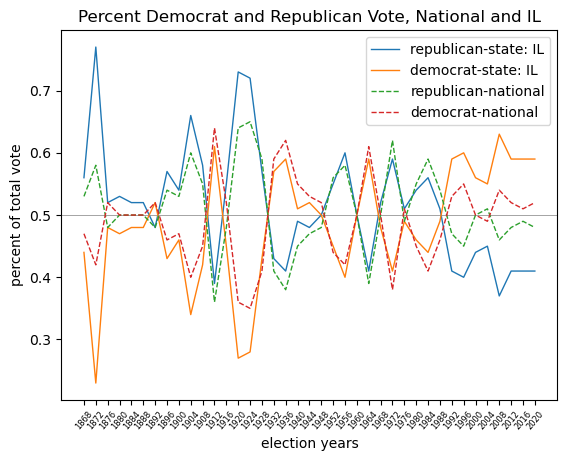

In [ ]:
state = 'IL'
collection = deepElectionResults
electionDict = election_2020
plt = plotProportionalVoteByPartyForOneState(collection, electionDict, state)
plt.show

This work will be used to visualize election results dating back to 1868 via HTML.

Frist, load the MongoDB JSON file. [PandasDF_fromMongoDB.ipynb]

Then, convert to a Pandas DataFrame and format the columns as desired for HTML. [Historical_Presidential_Table.html]

Create a 'templates' folder in the directory to store the html files, including the main index.html file.

Pass the HTML to an HTML template in order to render the template using Flask (app.py).

In [ ]:
# Import libraries required to convert MongoDB JSON file to Pandas DataFrame
import pandas as pd 
import json
import pymongo

In [ ]:
# Add path to MongoDB JSON file
mongo_file = 'historic_election_mongo.json'

In [ ]:
# Convert to a DataFrame and view
hist_elec_from_Json_df = pd.read_json('historic_election_mongo.json', orient='records')
hist_elec_from_Json_df.head(100)

,election_year,fips,county_name,state,dem_votes,dem_nominee,rep_votes,rep_nominee
0,1868,1001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant
1,1872,1001,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant
2,1876,1001,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes
3,1880,1001,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield
4,1884,1001,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine
...,...,...,...,...,...,...,...,...
95,1936,1005,BARBOUR,AL,2386,Franklin Delano Roosevelt,50,Alf Landon
96,1940,1005,BARBOUR,AL,2328,Franklin Delano Roosevelt,90,Wendell Willkie
97,1944,1005,BARBOUR,AL,2237,Franklin Delano Roosevelt,67,Thomes E. Dewey
98,1948,1005,BARBOUR,AL,1679,Harry S. Truman,101,Thomes E. Dewey


In [ ]:
# Rename columns for HTML view
hist_elec_from_Json_df_rename = hist_elec_from_Json_df.rename(columns={"election_year": "Year", "fips": "FIPS", "county_name": "County", "state": "State", "dem_votes": "Dem Votes", "dem_nominee": "Dem Nominee", "rep_votes": "Rep Votes", "rep_nominee": "Rep Nominee"})
hist_elec_from_Json_df_rename.head(100)

,Year,FIPS,County,State,Dem Votes,Dem Nominee,Rep Votes,Rep Nominee
0,1868,1001,AUTAUGA,AL,851,Horatio Seymour,1505,Ulysses S. Grant
1,1872,1001,AUTAUGA,AL,669,Horace Greeley,1593,Ulysses S. Grant
2,1876,1001,AUTAUGA,AL,804,Samuel J. Tilden,1576,Rutherford B. Hayes
3,1880,1001,AUTAUGA,AL,978,Winfield Scott Hancock,974,James A. Garfield
4,1884,1001,AUTAUGA,AL,911,Grover Cleveland,877,James G. Blaine
...,...,...,...,...,...,...,...,...
95,1936,1005,BARBOUR,AL,2386,Franklin Delano Roosevelt,50,Alf Landon
96,1940,1005,BARBOUR,AL,2328,Franklin Delano Roosevelt,90,Wendell Willkie
97,1944,1005,BARBOUR,AL,2237,Franklin Delano Roosevelt,67,Thomes E. Dewey
98,1948,1005,BARBOUR,AL,1679,Harry S. Truman,101,Thomes E. Dewey


In [ ]:
# Capture first 100 rows for HTML only since the full dataset is too large to load
hist_elec_from_Json_df_rename_limited = hist_elec_from_Json_df_rename.head(5000)

Once the DataFrame is created, save the DataFrame to an HTML table, create the HTML, then save as a file to use for the website.

In [ ]:
# Convert DataFrame to HTML
hist_elec_from_Json_df_rename_limitedview = hist_elec_from_Json_df_rename_limited.to_html(index=False, classes="table table=striped", border=0)

In [ ]:
# Create HTML for viewing
html_presidentialresults = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
  
    <!-- DataTables CSS -->
    <link rel="stylesheet" href="https://cdn.datatables.net/1.13.5/css/jquery.dataTables.min.css">
    <style>
        body {{
            font-family: Arial, sans-serif;
            #margin: 20px;
        }}
        .dataframe {{
            margin: 0 auto;
            width: 80%;
            border-collapse: collapse;
        }}
        table {{
            text-align: center;
            margin: auto;
        }}
    </style>
</head>
<body>

    <div>{hist_elec_from_Json_df_rename_limitedview}</div>

    <!-- jQuery and DataTables JS -->
    <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
    <script src="https://cdn.datatables.net/1.13.5/js/jquery.dataTables.min.js"></script>
    <script>
        $(document).ready(function() {{
            // Initialize DataTable
            $('table').DataTable();
        }});
    </script>
</body>
</html>
"""

In [ ]:
# Save the HTML to a file; confirm creation
with open("Historical_Presidential_Table_LimitedView.html", "w") as file:
    file.write(html_presidentialresults)

print("HTML file created: Historical_Presidential_Table_LimitedView.html")

HTML file created: Historical_Presidential_Table_LimitedView.html
